In [1]:
!pip install gTTS


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
cd /gdrive/My Drive/IIITB/cv/

/gdrive/My Drive/IIITB/cv


In [5]:
import os
import cv2 
import numpy as np
import requests
def humanDetect(image):
    yolo_config='yolov3.cfg'
    if not os.path.isfile(yolo_config):
        url='https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg'
        r=requests.get(url)
        with open(yolo_config,'wb') as f:
            f.write(r.content)
    yolo_weights = 'yolov3.weights'
    if not os.path.isfile(yolo_weights):
        url = 'https://pjreddie.com/media/files/yolov3.weights'
        r = requests.get(url)
        with open(yolo_weights, 'wb') as f:
            f.write(r.content)        
    classes_file='coco.names'
    if not os.path.isfile(classes_file):
        url='https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
        r=requests.get(url)
        with open(classes_file,'wb') as f:
            f.write(r.content)

    with open(classes_file,'r') as f:
        classes=[line.strip() for line in f.readlines()]

   
    blob=cv2.dnn.blobFromImage(image,1/255,(416,416),(0,0,0),True,crop=False)
    net=cv2.dnn.readNet(yolo_weights,yolo_config)
    net.setInput(blob)
    layer_names=net.getLayerNames()
    output_layers=[layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
    outs=net.forward(output_layers)
    class_ids= list()
    confidences= list()
    boxes= list()

    for out in outs:
        # iterate over anchor boxes for human class
        for detection in out:
            #bounding box
            center_x=int(detection[0] * image.shape[1])
            center_y=int(detection[1] * image.shape[0])
            w=int(detection[2] * image.shape[1])
            h=int(detection[3] * image.shape[0])
            x=center_x - w // 2
            y=center_y - h // 2
            boxes.append([x,y,w,h])
            #class
            class_id=np.argmax(detection[5:])
            class_ids.append(class_id)
            confidence=detection[4]
            confidences.append(float(confidence))
    #non-max supression
    ids=cv2.dnn.NMSBoxes(boxes,confidences,score_threshold=0.5,nms_threshold=0.9)
    #draw the bounding boxes on the image
    colors= np.random.uniform(0,255,size=(len(classes),3))
    for i in ids:
        i=i[0]
        x,y,w,h=boxes[i]
        class_id=class_ids[i]
        color=colors[class_id]
        if classes[class_id]=='person':
            #cv2.rectangle(image,(round(x),round(y)),(round(x+w),round(y+h)),color,2)
            #label="%s:%.2f"%(classes[class_id],confidences[i])
            #cv2.putText(image,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,color,2)
            #cv2.imshow("object detection",image)
            crop= image[y:y+h,x:x+w]
            return crop           
        return None



In [ ]:
cap= cv2.VideoCapture('1.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break    
    cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=2000

In [6]:
img = cv2.imread("1.png", cv2.IMREAD_COLOR)

In [8]:
detected = humanDetect(img)

Populating the interactive namespace from numpy and matplotlib


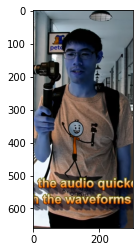

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#img = mpimg.imread('your_image.png')
imgplot = plt.imshow(detected)
plt.show()